In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
digits.data.shape

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


(1797, 64)

### **visualize the first few data points**

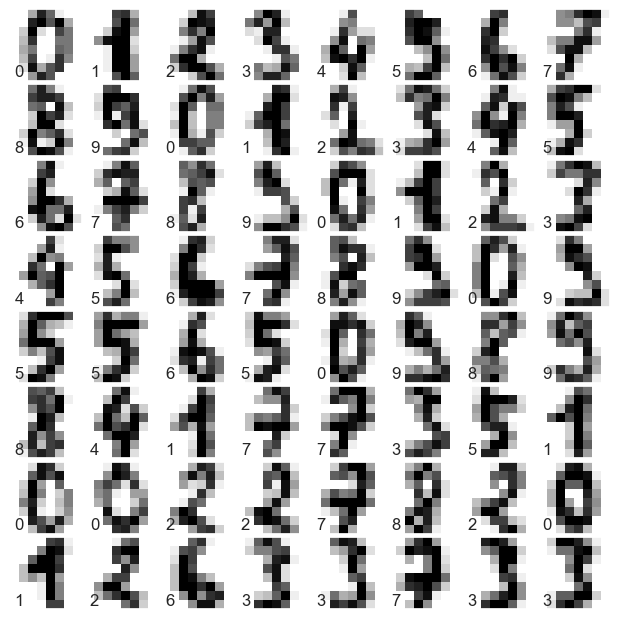

In [15]:

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [16]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

### **take a look at the classification report for this classifier:**

In [17]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

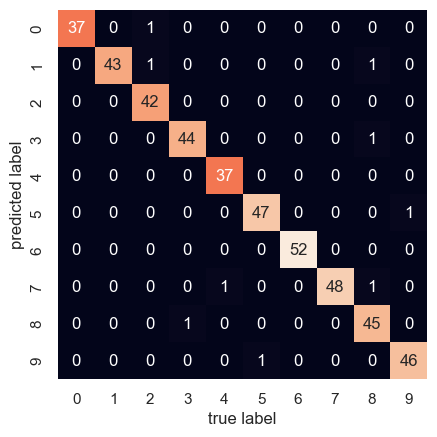

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

untuned random forest results in a very accurate classification of the digits data.

Recall that the data consists of *8×8* pixel images, meaning that they are **64-dimensional**.
> #### use PCA to project them to a more manageable number of dimensions, say two:

In [19]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


### **Plot the first two principal components of each point to learn about the data:**

C:\Users\Battousai\AppData\Local\Temp\ipykernel_19876\314140583.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('viridis'))


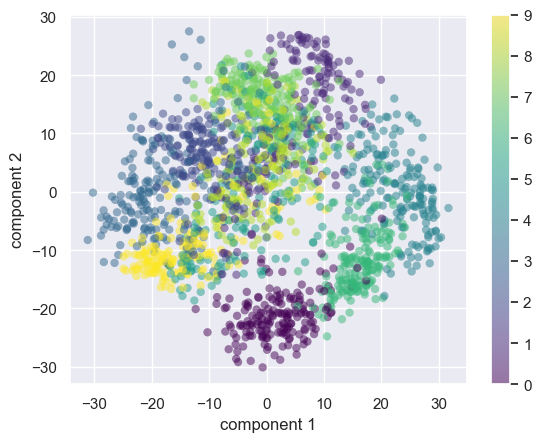

In [20]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

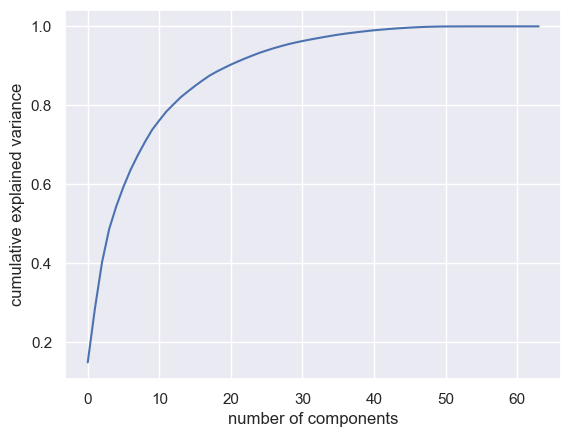

In [21]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [22]:
pca = PCA(30)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.data.shape)

(1797, 64)
(1797, 30)


In [23]:
X_pca = pca.fit_transform(digits.data)

In [26]:
# # Split data
Xtrain, Xtest, ytrain, ytest = train_test_split(X_pca, digits.target, random_state=0)

In [27]:
# Train Random Forest
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [28]:
# Evaluate the model
print(metrics.classification_report(ypred, ytest))

# Confusion matrix
conf_matrix = metrics.confusion_matrix(ytest, ypred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.93      0.97        46
           2       0.98      0.96      0.97        45
           3       0.96      1.00      0.98        43
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       0.98      1.00      0.99        51
           7       1.00      0.96      0.98        50
           8       0.92      0.98      0.95        45
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



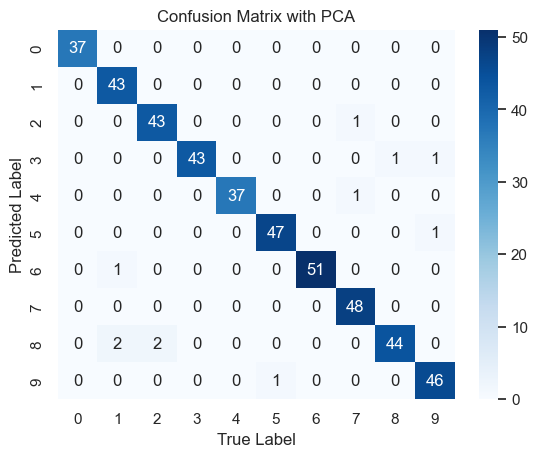

In [29]:
# Plot confusion matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix with PCA')
plt.show()

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.93      0.97        46
           2       0.98      0.98      0.98        44
           3       0.96      1.00      0.98        43
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       0.98      1.00      0.99        51
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



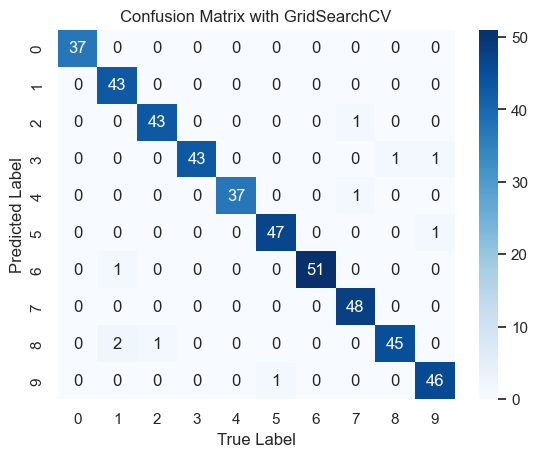

In [30]:
from sklearn.model_selection import GridSearchCV

# Define Random Forest model
rf = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(Xtrain, ytrain)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train model with best parameters
best_rf = grid_search.best_estimator_
ypred_grid = best_rf.predict(Xtest)

# Evaluate the model
print(metrics.classification_report(ypred_grid, ytest))

# Confusion matrix
conf_matrix = metrics.confusion_matrix(ytest, ypred_grid)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix with GridSearchCV')
plt.show()

### **Analysis of Results:**  

#### **1. PCA Results:**  
   - **Overall Accuracy:**  
     - The model’s accuracy remains at **98%** after applying PCA, indicating that dimensionality reduction has not significantly impacted performance.  
     - This suggests that the principal components retain most of the original information.  

   - **Class-wise Performance Changes:**  
     - **Class 1 (Digit 1):** The `recall` has slightly decreased to 93%, implying that some class-specific features might have been lost during dimensionality reduction.  
     - **Class 8 (Digit 8):** The `precision` has dropped to 92%, but `recall` has improved. This means that while the model identifies more actual instances of this class, it has slightly reduced prediction accuracy.  

   - **Confusion Matrix Analysis:**  
     - The confusion matrix shows similar misclassification patterns as the original model, but the PCA-applied model still performs well.  

---

#### **2. GridSearchCV Results:**  
   - **Overall Accuracy:**  
     - The accuracy remains at **98%** after hyperparameter tuning using GridSearchCV, similar to the base model.  

   - **Optimal Hyperparameters:**  
     - The best parameters found are:  
       - `max_depth=20`: Limits tree depth to prevent overfitting.  
       - `min_samples_leaf=1`: Minimum samples per leaf node is 1.  
       - `min_samples_split=2`: Minimum samples required for node splitting is 2.  
       - `n_estimators=1000`: Number of trees in the random forest remains 1000.  
     - These adjustments optimize the model without significantly affecting accuracy.  

   - **Class-wise Performance Changes:**  
     - **Class 1 (Digit 1):** Similar to PCA, with `recall` at 93%.  
     - **Class 8 (Digit 8):** `Precision` has improved to 94%, indicating that hyperparameter tuning has enhanced this class's performance.  

   - **Confusion Matrix Analysis:**  
     - The model with optimized parameters shows performance very similar to the PCA model, but class 8 performs slightly better.  

---

### **Comparison of PCA and GridSearchCV Results:**  

| **Method**       | **Overall Accuracy** | **Affected Classes** | **Strengths**                                                        | **Weaknesses**                                                   |  
|------------------|---------------------|----------------------|----------------------------------------------------------------------|------------------------------------------------------------------|  
| **PCA**         | 98%                  | Classes 1 & 8        | Reduces complexity, removes noise, and improves efficiency.          | Lower `recall` for class 1 and lower `precision` for class 8.    |  
| **GridSearchCV** | 98%                  | Classes 1 & 8        | Optimizes parameters, improves class 8 precision, prevents overfitting. | No major improvement in overall accuracy.                         |  

---

### **Final Recommendation:**  
1. **Choosing PCA or GridSearchCV for the current project:**  
   - If the goal is **reducing complexity and increasing speed**, **PCA** is a good choice.  
   - If the goal is **fine-tuning hyperparameters for optimal model performance**, **GridSearchCV** is preferable.  

2. **For larger-scale projects:**  
   - **PCA** may be less effective for complex models like CNNs since they inherently extract important features.  
   - Using **GridSearchCV-like techniques for CNN hyperparameter tuning** (e.g., Keras Tuner) will be crucial.  
   - **Data augmentation** is recommended to improve the performance of lower-accuracy classes (e.g., class 8).  

